In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error

plt.rcParams['figure.figsize'] = [45,30]
plt.rc('font', size = 20)
import warnings
warnings.filterwarnings('ignore')

In [2]:
appl = pd.read_csv("/Users/kundaimariga/Downloads/AAPL.csv")

In [3]:
appl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.562591,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.573935,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.469369,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.457407,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.500339,447610800
...,...,...,...,...,...,...,...
2763,2020-12-23,132.160004,132.429993,130.779999,130.960007,130.347565,88223700
2764,2020-12-24,131.320007,133.460007,131.100006,131.970001,131.352829,54930100
2765,2020-12-28,133.990005,137.339996,133.509995,136.690002,136.050766,124486200
2766,2020-12-29,138.050003,138.789993,134.339996,134.869995,134.239273,121047300


In [4]:
appltweets = pd.read_csv("/Users/kundaimariga/Downloads/AAPL-5.csv")

In [5]:
appltweets

,date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430
...,...,...,...
1336,2019-08-29,0.056460,1083
1337,2019-08-30,0.106096,1005
1338,2019-08-31,0.151625,224
1339,2019-09-01,0.059887,200


In [6]:
appltweets = appltweets.rename(columns={'date': 'Date'})

In [7]:
appltweets = appltweets.astype({'Date': 'datetime64[ns]'})

In [8]:
appl = appl.astype({'Date': 'datetime64[ns]'})

In [9]:
applfull = pd.merge(appl, appltweets, on = 'Date')
applfull = applfull.astype({'Date': 'datetime64[ns]'})
applnew = applfull.set_index('Date')
applnew

,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
Date,,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.286833,270597600,0.070389,1133
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.678219,223164000,0.133635,1430
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.214844,273829600,0.072042,1949
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.235069,324377600,0.074369,2289
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.352642,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...
2019-08-26,51.465000,51.797501,51.264999,51.622501,50.788677,104174400,0.072340,888
2019-08-27,51.965000,52.137501,50.882500,51.040001,50.215584,103493200,0.117541,962
2019-08-28,51.025002,51.430000,50.830002,51.382500,50.552551,63755200,0.061477,895


In [10]:
applnew.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-26', '2019-08-27', '2019-08-28',
               '2019-08-29', '2019-08-30'],
              dtype='datetime64[ns]', name='Date', length=922, freq=None)

In [11]:
applnew['Date'] = pd.to_datetime(applnew.index)
applnew['Date'] = applnew['Date'].apply(mpl_dates.date2num)

applnew = applnew.loc[:,['Date', 'Open', 'High', 'Low', 'Adj Close','Volume', 'ts_polarity', 'twitter_volume']]
appl = applnew

In [12]:
appl

,Date,Open,High,Low,Adj Close,Volume,ts_polarity,twitter_volume
Date,,,,,,,,
2016-01-04,16804.0,25.652500,26.342501,25.500000,24.286833,270597600,0.070389,1133
2016-01-05,16805.0,26.437500,26.462500,25.602501,23.678219,223164000,0.133635,1430
2016-01-06,16806.0,25.139999,25.592501,24.967501,23.214844,273829600,0.072042,1949
2016-01-07,16807.0,24.670000,25.032499,24.107500,22.235069,324377600,0.074369,2289
2016-01-08,16808.0,24.637501,24.777500,24.190001,22.352642,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...
2019-08-26,18134.0,51.465000,51.797501,51.264999,50.788677,104174400,0.072340,888
2019-08-27,18135.0,51.965000,52.137501,50.882500,50.215584,103493200,0.117541,962
2019-08-28,18136.0,51.025002,51.430000,50.830002,50.552551,63755200,0.061477,895


# <span style="color:indigo">Computing the Relative Strength Index</span>

In [13]:
import requests
from math import floor
from termcolor import colored as cl 

plt.style.use('fivethirtyeight')

In [14]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_appl = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_appl = rsi_appl.dropna()
    return rsi_appl[3:]

appl['rsi_14'] = get_rsi(appl['Adj Close'], 14)
appl = appl.dropna()
appl

,Date,Open,High,Low,Adj Close,Volume,ts_polarity,twitter_volume,rsi_14
Date,,,,,,,,,
2016-01-08,16808.0,24.637501,24.777500,24.190001,22.352642,283192000,0.051595,2235,6.142157
2016-01-11,16811.0,24.742500,24.764999,24.334999,22.714584,198957600,0.019443,1222,22.020872
2016-01-12,16812.0,25.137501,25.172501,24.709999,23.044250,196616800,0.121364,1293,33.119387
2016-01-13,16813.0,25.080000,25.297501,24.325001,22.451773,249758400,0.107714,1292,25.966493
2016-01-14,16814.0,24.490000,25.120001,23.934999,22.942814,252680400,0.039248,1264,37.931240
...,...,...,...,...,...,...,...,...,...
2019-08-26,18134.0,51.465000,51.797501,51.264999,50.788677,104174400,0.072340,888,51.825304
2019-08-27,18135.0,51.965000,52.137501,50.882500,50.215584,103493200,0.117541,962,49.213321
2019-08-28,18136.0,51.025002,51.430000,50.830002,50.552551,63755200,0.061477,895,50.783980


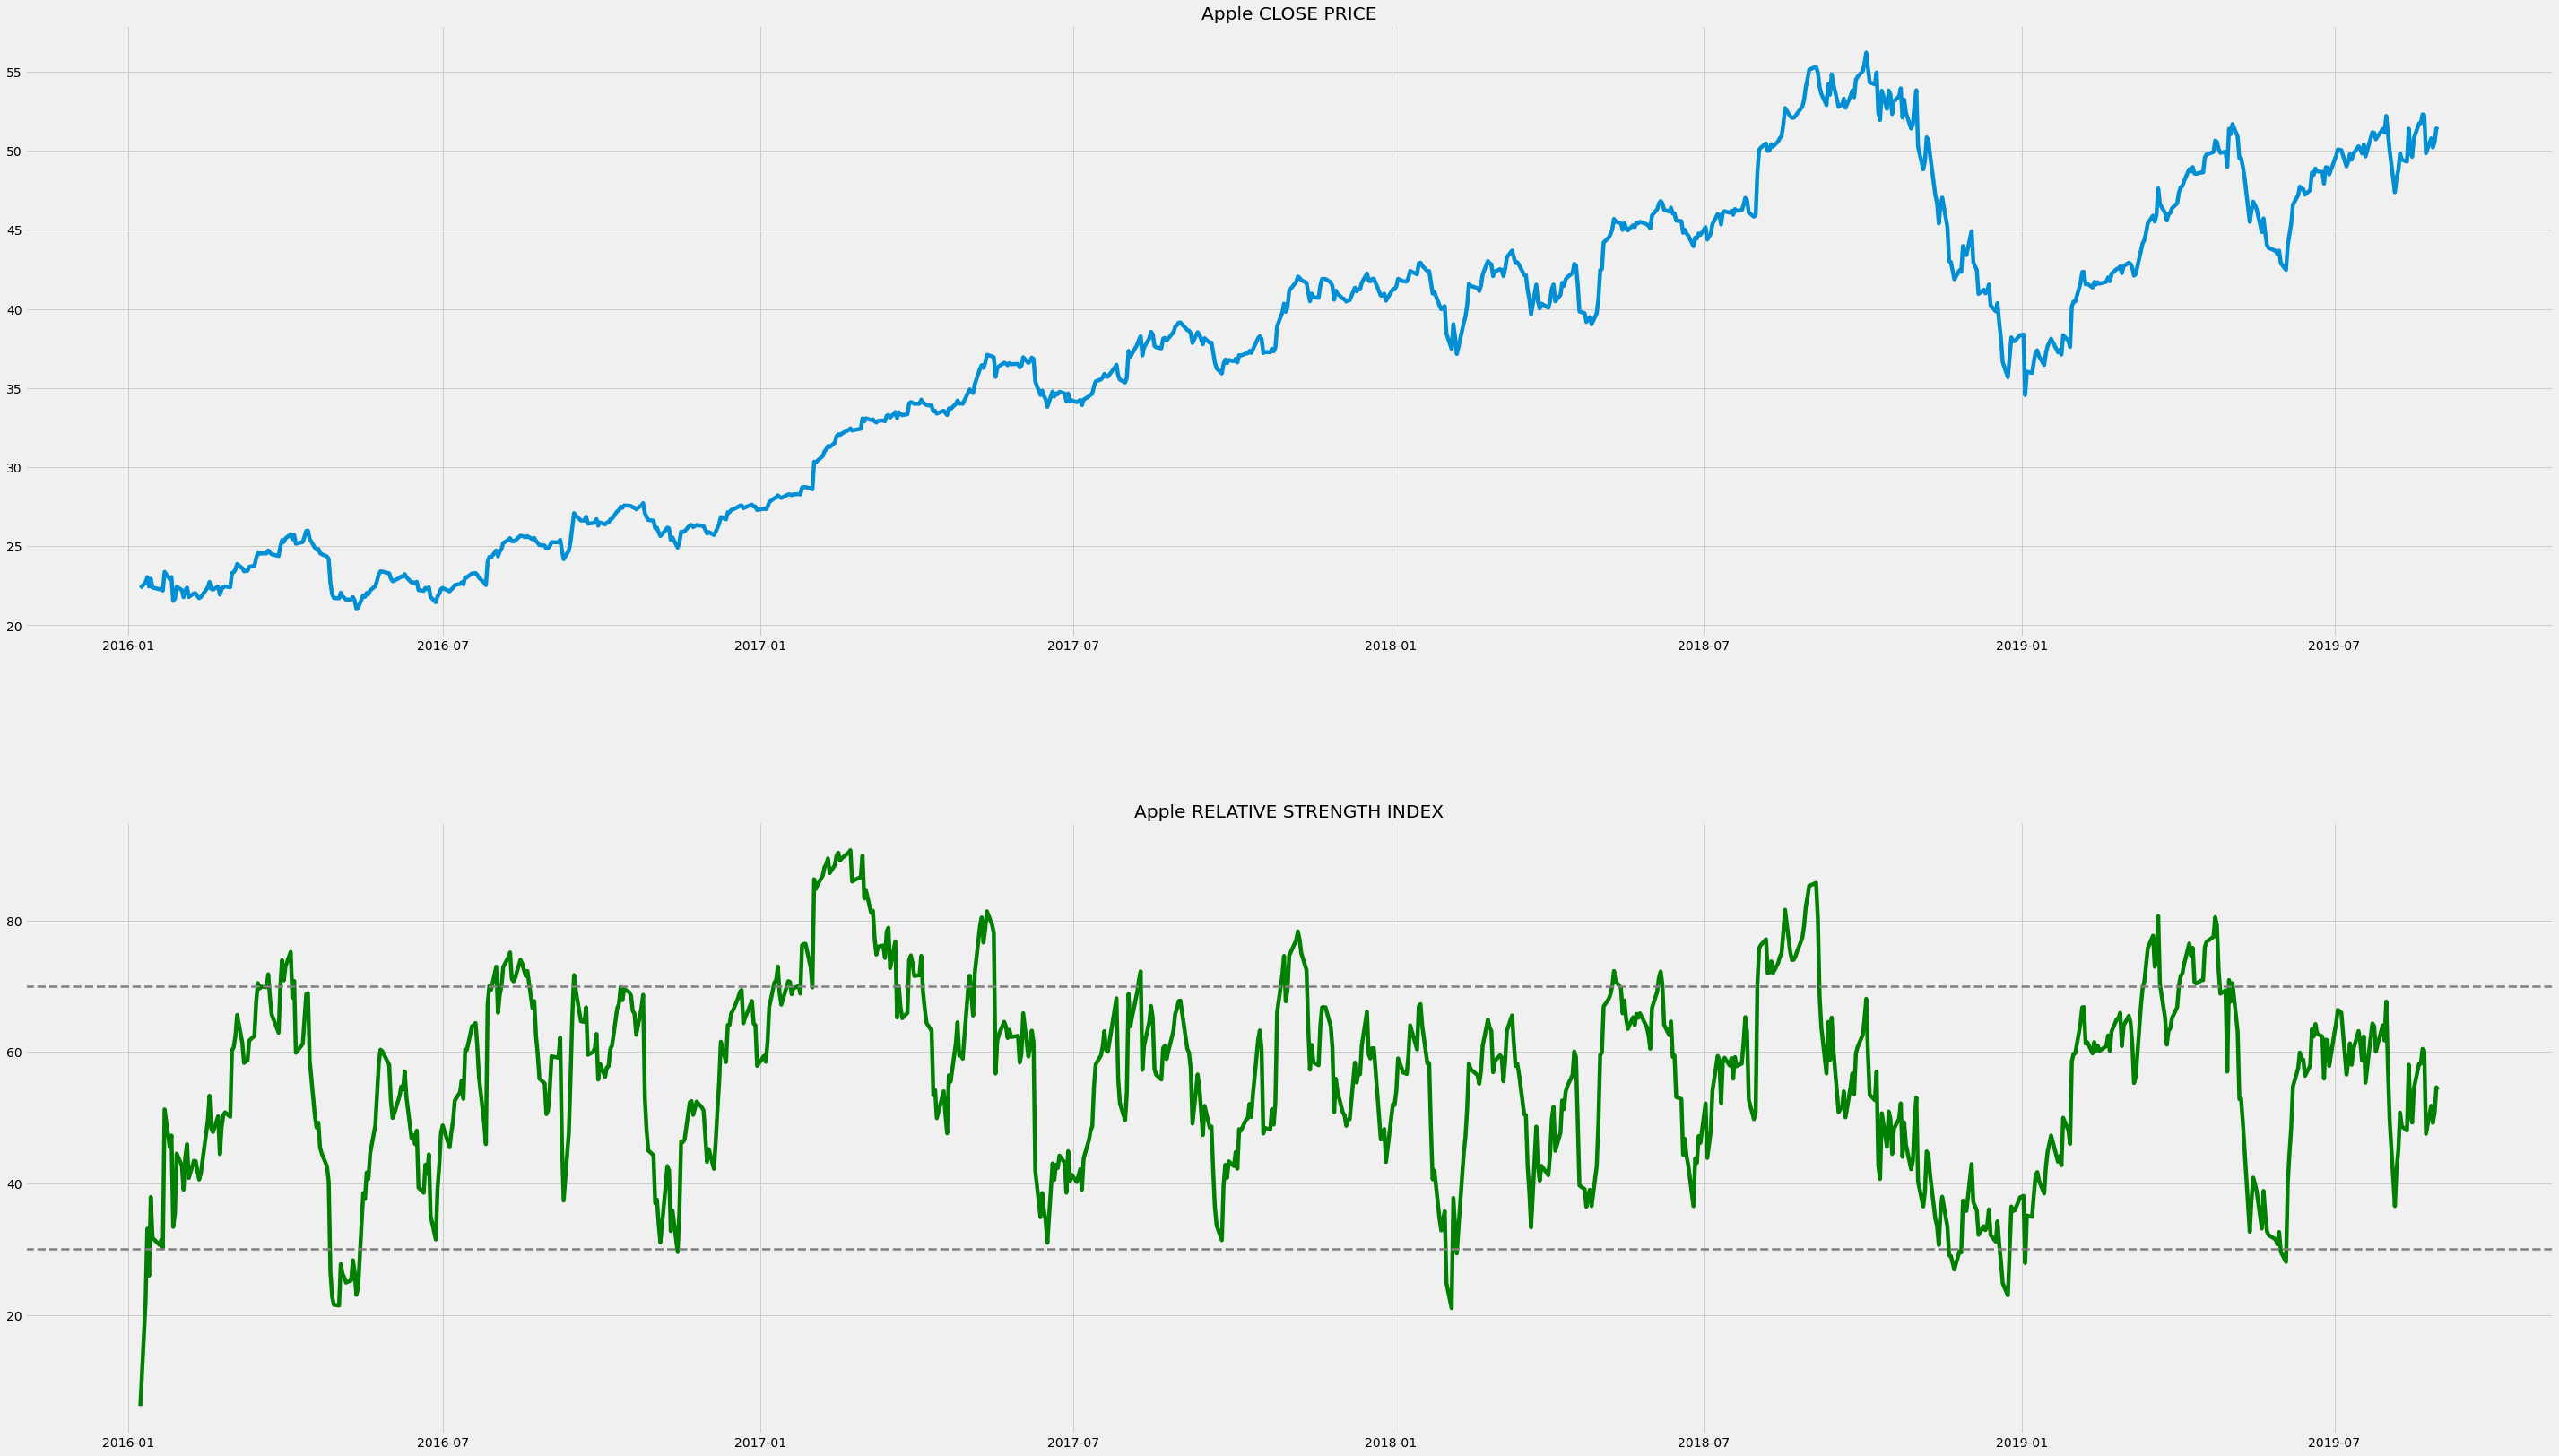

In [15]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(appl['Adj Close'], linewidth = 4.5)
ax1.set_title('Apple CLOSE PRICE')
ax2.plot(appl['rsi_14'], color = 'green', linewidth = 4.5)
ax2.axhline(30, linestyle = '--', linewidth = 2.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 2.5, color = 'grey')
ax2.set_title('Apple RELATIVE STRENGTH INDEX')
plt.show()

In [16]:
from sklearn import datasets

In [17]:
sentiment = [] 
for score in appl['ts_polarity']:
    if score >= 0.05 :
          sentiment.append("1") 
    elif score <= - 0.05 : 
          sentiment.append("-1")        
    else : 
        sentiment.append("0") 
        
#where polarity >=0.05 is positive, =< -0.05 is negative, otherwise it is neutral

appl["Sentiment"] = sentiment
appl.head()

,Date,Open,High,Low,Adj Close,Volume,ts_polarity,twitter_volume,rsi_14,Sentiment
Date,,,,,,,,,,
2016-01-08,16808.0,24.637501,24.777500,24.190001,22.352642,283192000,0.051595,2235,6.142157,1
2016-01-11,16811.0,24.742500,24.764999,24.334999,22.714584,198957600,0.019443,1222,22.020872,0
2016-01-12,16812.0,25.137501,25.172501,24.709999,23.044250,196616800,0.121364,1293,33.119387,1
2016-01-13,16813.0,25.080000,25.297501,24.325001,22.451773,249758400,0.107714,1292,25.966493,1
2016-01-14,16814.0,24.490000,25.120001,23.934999,22.942814,252680400,0.039248,1264,37.931240,0


In [18]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(appl['Adj Close'], appl['rsi_14'])


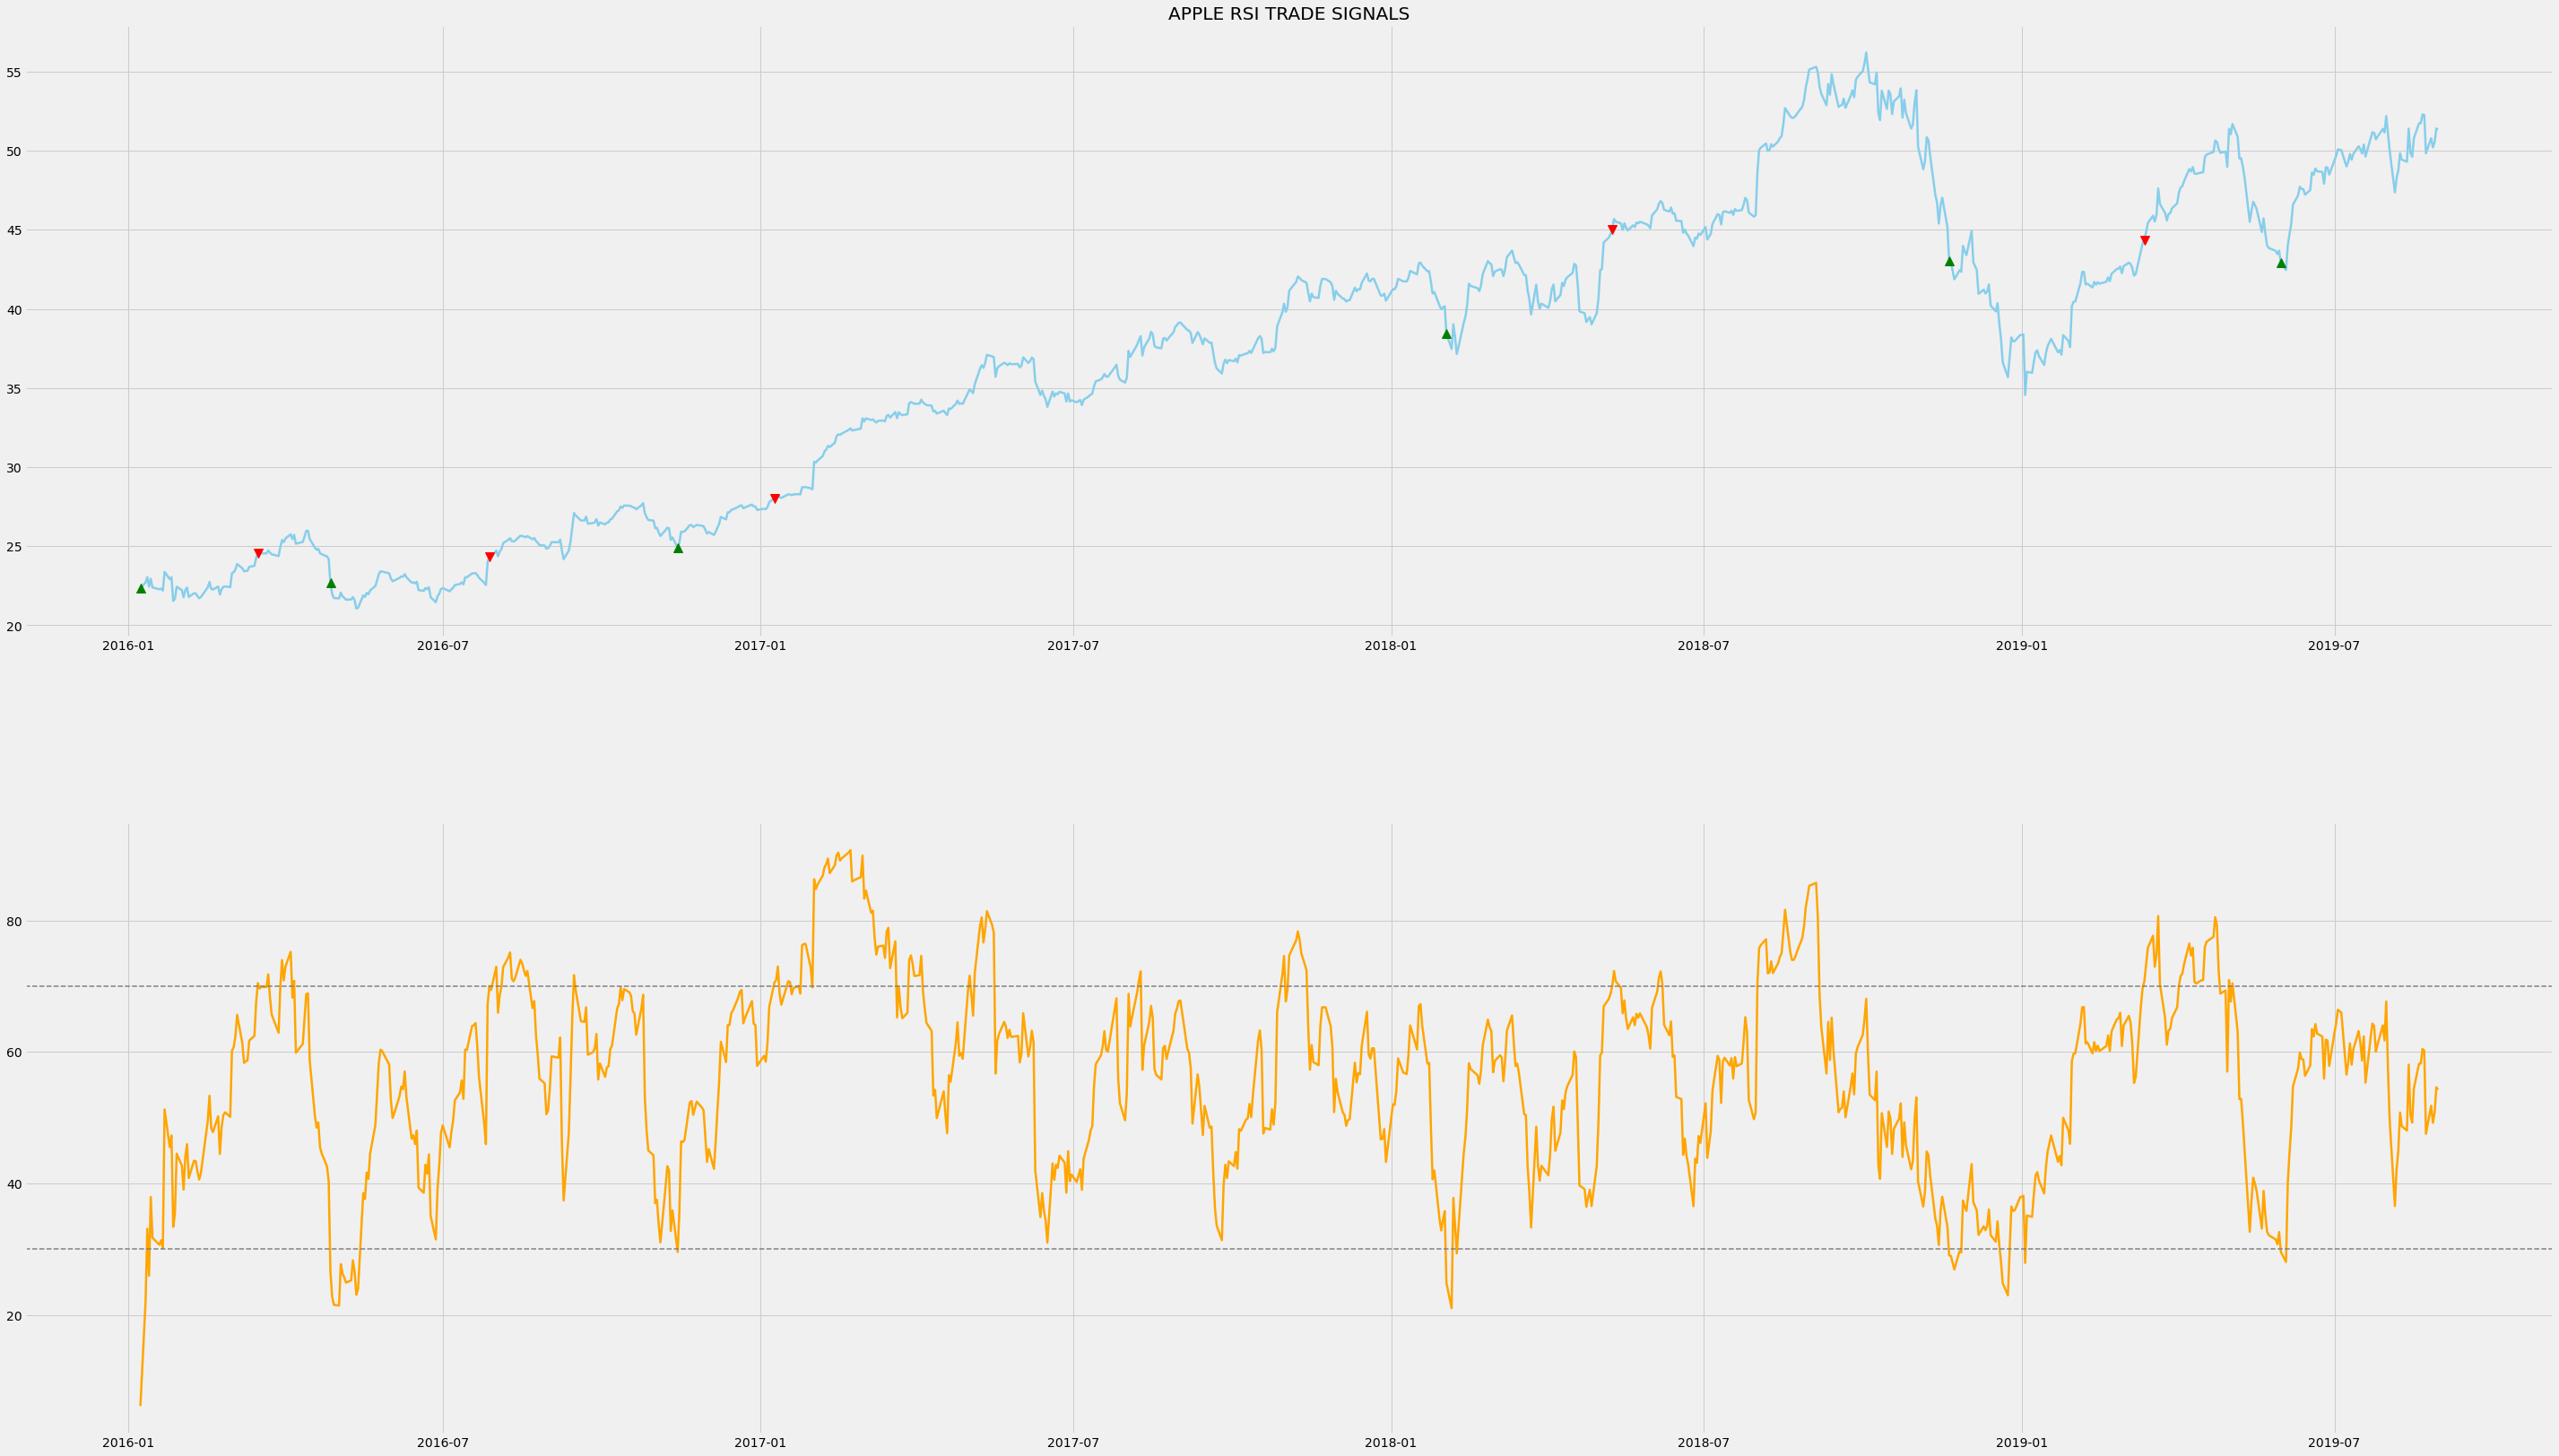

In [19]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(appl['Adj Close'], linewidth = 2.5, color = 'skyblue', label = 'APPLE')
ax1.plot(appl.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(appl.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('APPLE RSI TRADE SIGNALS')
ax2.plot(appl['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()

In [20]:
position = []
for i in range(len(rsi_signal)):
    if rsi_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(appl['Adj Close'])):
    if rsi_signal[i] == 1:
        position[i] = 1
    elif rsi_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
rsi = appl['rsi_14']
close_price = appl['Adj Close']
rsi_signal = pd.DataFrame(rsi_signal).rename(columns = {0:'rsi_signal'}).set_index(appl.index)
position = pd.DataFrame(position).rename(columns = {0:'rsi_position'}).set_index(appl.index)

frames = [close_price, rsi, rsi_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.head()

,Adj Close,rsi_14,rsi_signal,rsi_position
Date,,,,
2016-01-08,22.352642,6.142157,1,1
2016-01-11,22.714584,22.020872,0,1
2016-01-12,23.044250,33.119387,0,1
2016-01-13,22.451773,25.966493,0,1
2016-01-14,22.942814,37.931240,0,1


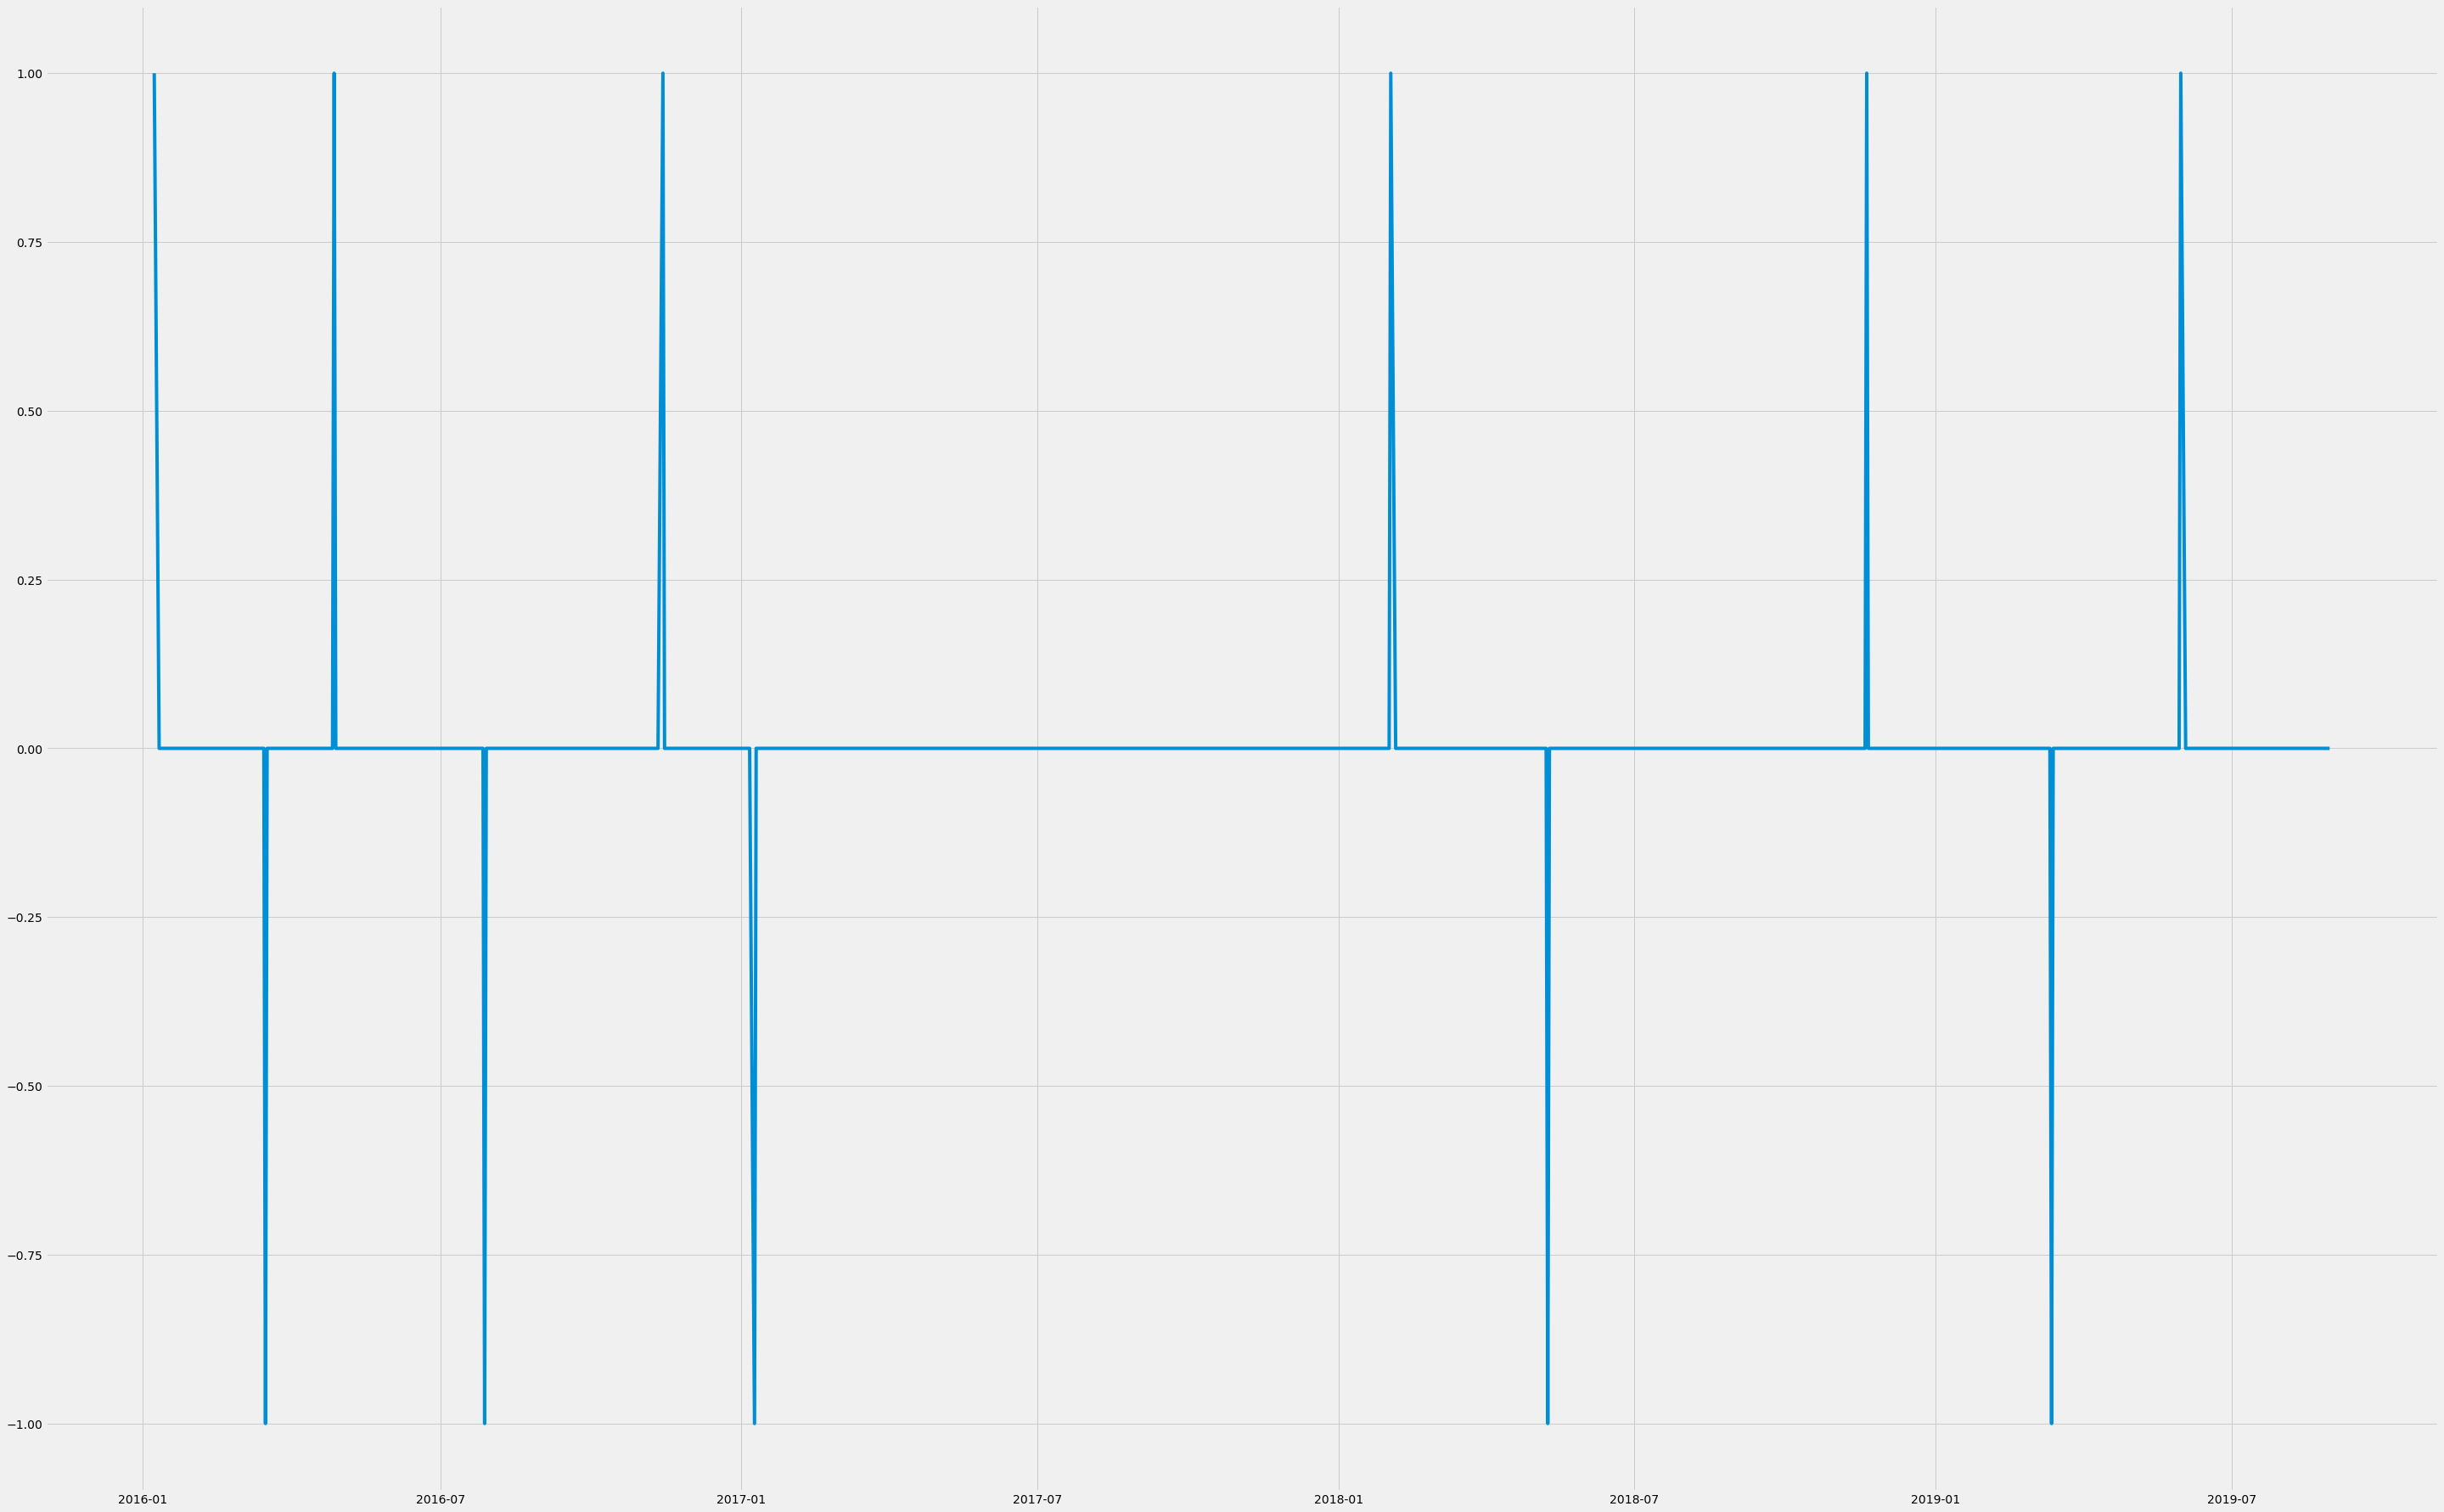

In [26]:
plt.plot(strategy['rsi_signal'])

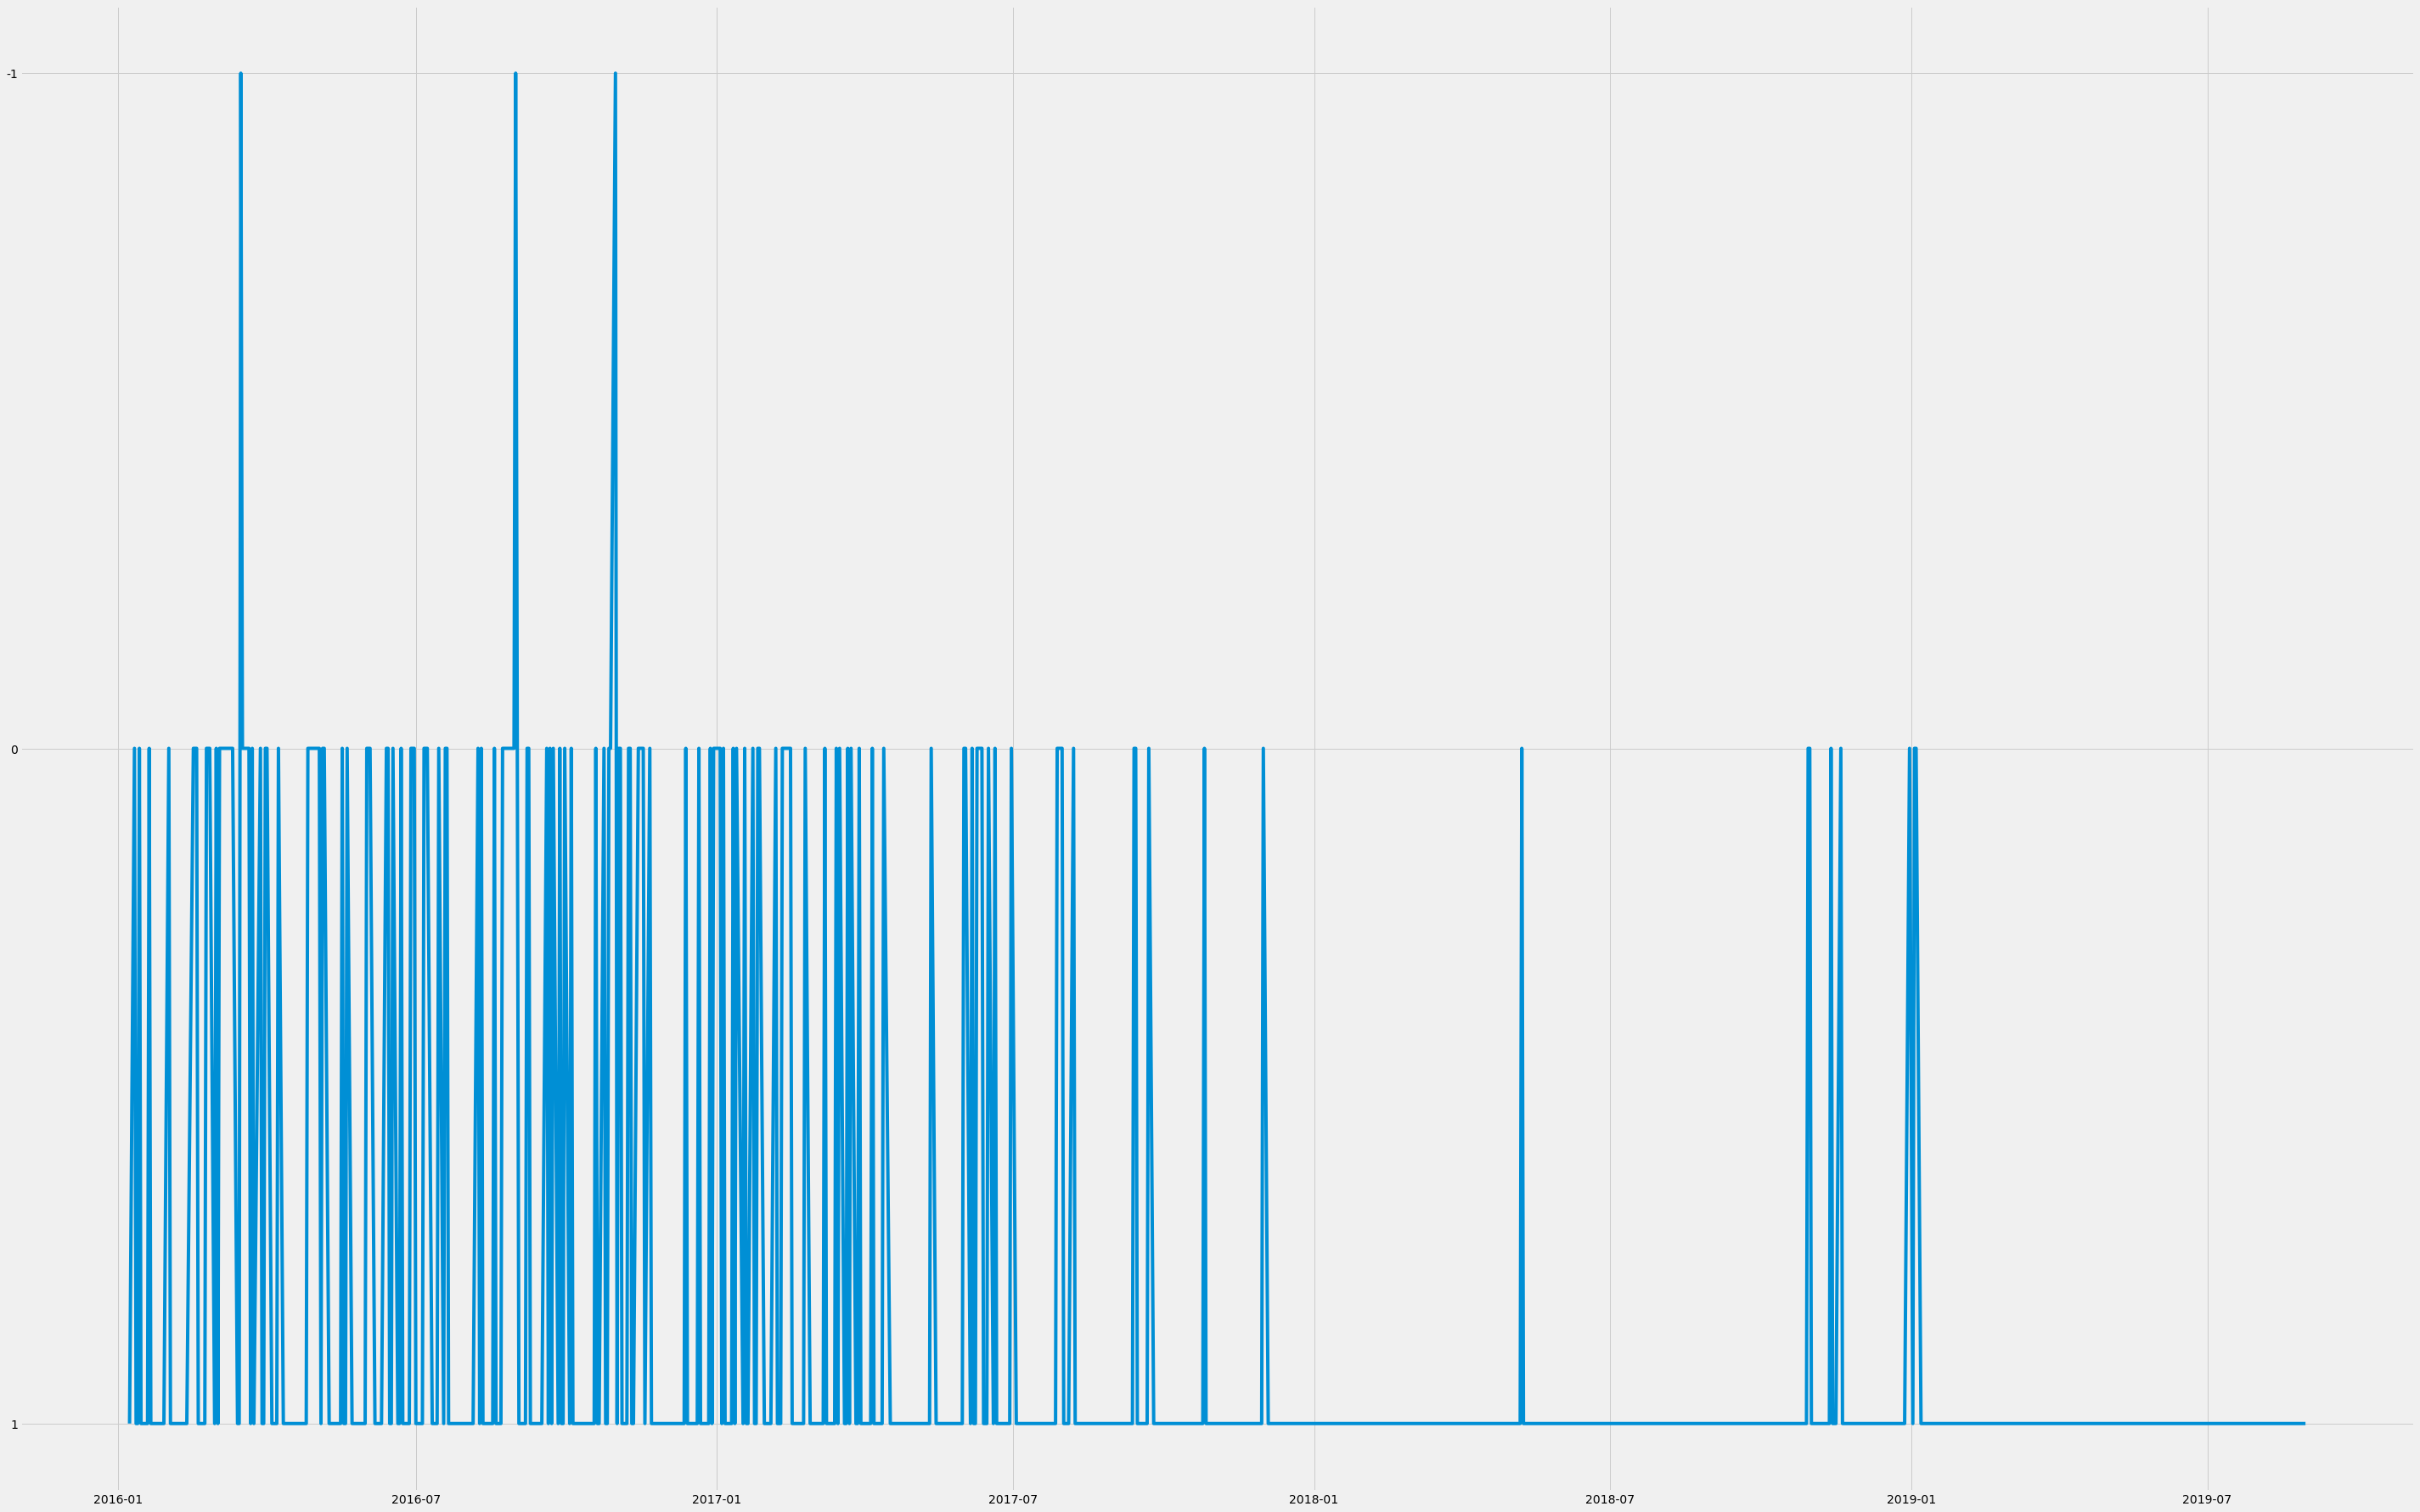

In [25]:
plt.plot(appl['Sentiment'])